# Итоговое упражнение
Этот элемент курса оценивается как 'Итоговое задание'  
вес: 1.0

## Задача 1

По имеющимся [данным](./data/ITMOUniversity+DATAN+summer_2018+type@asset+block@4.csv) постройте диаграмму, подобрав ее тип таким образом, чтобы изображение соответствовало одной из картинок. Номер картинки является ответом.

![faces.png](./data/ITMOUniversity+DATAN+summer_2018+type@asset+block@faces.png "faces.png")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string

In [3]:
df1 = pd.read_csv('./data/ITMOUniversity+DATAN+summer_2018+type@asset+block@4.csv')
df1

,X,Y,Z,L,R
0,-100,0.0,NaN,NaN,NaN
1,-99,14.0,NaN,NaN,NaN
2,-98,20.0,NaN,NaN,NaN
3,-97,24.0,NaN,NaN,NaN
4,-96,28.0,NaN,NaN,NaN
...,...,...,...,...,...
562,-56,NaN,NaN,17.0,NaN
563,-57,NaN,NaN,18.0,NaN
564,-58,NaN,NaN,19.0,NaN
565,-59,NaN,NaN,21.0,NaN


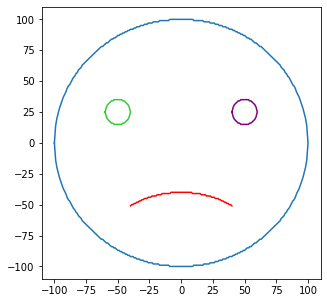

In [4]:
plt.figure(figsize=(5,5))
plt.plot(df1['X'], df1['Y'])
plt.plot(df1['X'], df1['Z'], color='red')
plt.plot(df1['X'], df1['L'], color='limegreen')
plt.plot(df1['X'], df1['R'], color='purple')
plt.show()

**Ответ:**
```sh
4
```

## Задача 2

Для заданного временного ряда: $ Y = \text{[44, 47, 49, 53, 50, 55, 37, 57, 52, 58, 43, 51, 48, 56, 45, 65, 63, 64, 61, 68, 71, 70, 59, 74, 66]} $  

Определите коэффициент $ \alpha $ линейного тренда, задаваемого уравнением вида: $ y=ax+b $  
<sub>**Введите значение, округленное до сотых.**</sub>

In [5]:
Y = [44, 47, 49, 53, 50, 55, 37, 57, 52, 58, 43, 51, 48, 56, 45, 65, 63, 64, 61, 68, 71, 70, 59, 74, 66]
Y_mean = sum(Y) / len(Y)
n = len(Y)
x = list(range(1, n+1, 1))

$$ a=\frac{n \sum_{i=1}^{n} x_{i} y_{i}-\sum_{i=1}^{n} x_{i} \sum_{i=1}^{n} y_{i}}{n \sum_{i=1}^{n} x_{i}^{2}-\left(\sum_{i=1}^{n} x_{i}\right)^{2}} $$

In [6]:
# Alternative way to calculate alpha
# alpha = (n*sum([(i+1)*v for i,v in enumerate(Y)]) - sum(range(1,n+1,1))*sum(Y)) / \
#         (n*(sum([(i+1)*(i+1) for i,v in enumerate(Y)])) - (sum(range(1,n+1,1)))**2)

alpha = (n*sum([Y[i]*x[i] for i in range(n)]) - sum(x)*sum(Y)) / \
        (n*sum([v**2 for v in x]) - sum(x)**2)

print('𝛼 =', round(alpha, 2))

𝛼 = 1.02


$$ b=\frac{\sum_{i=1}^{n} y_{i}-a \sum_{i=1}^{n} x_{i}}{n} $$  

In [7]:
b = (sum(Y) - alpha*sum(x)) / n
print('b =', b)

b = 42.98


In [8]:
Y_trend = [alpha*x[i]+b for i in range(n)]
print('Y_trend:', Y_trend)

Y_trend: [44.0, 45.019999999999996, 46.04, 47.059999999999995, 48.08, 49.099999999999994, 50.12, 51.14, 52.16, 53.17999999999999, 54.199999999999996, 55.22, 56.239999999999995, 57.26, 58.28, 59.3, 60.31999999999999, 61.339999999999996, 62.36, 63.379999999999995, 64.4, 65.42, 66.44, 67.46, 68.47999999999999]


$$ R^{2}=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\widehat y_{i}\right)^2}{\sum_{i=1}^{n}\left(y_{i}-\overline y\right)^2} $$  
где $ \widehat y_{i} $ — значение тренда в точке $ i $, $ \overline y $ — среднее значение изначального ряда.

Определите коэффициент детерминации $ R^2 $ для тренда.

Введите значение $ R^2 $:  
<sub>**Введите значение, округленное до тысячных.**</sub>

In [9]:
R2 = 1 - sum([(Y[i] - Y_trend[i])**2 for i in range(n)]) / sum([(Y[i] - Y_mean)**2 for i in range(n)])

print('R**2 =', round(R2, 3))

R**2 = 0.589


## Задача 3

Сеть ресторанов ежемесячно определяет лучший ресторан по следующим критериям:

- количество гостей ресторана на одного сотрудника ресторана;
- выручка ресторана на одного сотрудника;
- рейтинг ресторана в социальных сетях (количество звезд от 0 до 10).

Имеются следующие данные за месяц по всем ресторанам сети:  

Ресторан | Количество гостей ресторана на одного сотрудника ресторана | Количество проданных новых позиций из меню ресторана на одного сотрудника | Рейтинг ресторана в социальных сетях
--|--|--|--
A | 876 | 500892 | 10
B | 807 | 100685 | 9
C | 536 | 396147 | 9
D | 407 | 620562 | 10
E | 609 | 246346 | 5
F | 524 | 295122 | 4
G | 827 | 622283 | 7
H | 442 | 214640 | 3
I | 581 | 440507 | 8
J | 667 | 243169 | 9
K | 927 | 680525 | 9
L | 604 | 581908 | 6
M | 425 | 368782 | 10
N | 805 | 148267 | 6
O | 695 | 292033 | 4
P | 400 | 404764 | 7
Q | 928 | 659701 | 10
R | 987 | 165434 | 10
S | 848 | 430760 | 8
T | 922 | 523937 | 0

Определите три лучших ресторана месяца. Для определения лучшего ресторана используйте **линейную нормировку** показателей, а в качестве целевой функции используйте сумму нормированных показателей.

Введите три названия лучших ресторанов через запятую, например A,B,C.

In [10]:
d = {'restaurant': list(string.ascii_uppercase[:20]),
     'guest_staff': [876, 807, 536, 407, 609, 524, 827, 442, 581, 667, 927, 604, 425, 805, 695, 400, 928, 987, 848, 922],
     'sold_on_staff': [500892, 100685, 396147, 620562, 246346, 295122, 622283, 214640, 440507, 243169, 680525, 581908, 368782, 148267, 292033, 404764, 659701, 165434, 430760, 523937],
     'rating': [10, 9, 9, 10, 5, 4, 7, 3, 8, 9, 9, 6, 10, 6, 4, 7, 10, 10, 8, 0]
    }
df3 = pd.DataFrame(data=d)

df3

,restaurant,guest_staff,sold_on_staff,rating
0,A,876,500892,10
1,B,807,100685,9
2,C,536,396147,9
3,D,407,620562,10
4,E,609,246346,5
5,F,524,295122,4
6,G,827,622283,7
7,H,442,214640,3
8,I,581,440507,8
9,J,667,243169,9


Формула линейной нормировки:

$$ y_i=\frac{x_i-x_{min}}{x_{max}-x_{min}} $$

In [11]:
# Normalize values in the following columns
df3['norm_guest_staff'] = (df3['guest_staff'] - df3['guest_staff'].min()) / (df3['guest_staff'].max() - df3['guest_staff'].min())
df3['norm_sold_on_staff'] = (df3['sold_on_staff'] - df3['sold_on_staff'].min()) / (df3['sold_on_staff'].max() - df3['sold_on_staff'].min())
df3['norm_rating'] = (df3['rating'] - df3['rating'].min()) / (df3['rating'].max() - df3['rating'].min())


# Create RESULT column as sum of normalized DISTANCE, STOP_COUNT, COST columns
df3['RESULT'] = df3['norm_guest_staff'] + df3['norm_sold_on_staff'] + df3['norm_rating']
df3

,restaurant,guest_staff,sold_on_staff,rating,norm_guest_staff,norm_sold_on_staff,norm_rating,RESULT
0,A,876,500892,10,0.810903,0.690202,1.0,2.501105
1,B,807,100685,9,0.693356,0.000000,0.9,1.593356
2,C,536,396147,9,0.231687,0.509558,0.9,1.641244
3,D,407,620562,10,0.011925,0.896587,1.0,1.908512
4,E,609,246346,5,0.356048,0.251209,0.5,1.107257
5,F,524,295122,4,0.211244,0.335329,0.4,0.946572
6,G,827,622283,7,0.727428,0.899555,0.7,2.326983
7,H,442,214640,3,0.071550,0.196528,0.3,0.568079
8,I,581,440507,8,0.308348,0.586062,0.8,1.694409
9,J,667,243169,9,0.454855,0.245730,0.9,1.600585


In [12]:
# We are interested in the largest number of customers per staff member, the largest number of sold
# positions and the largest rating on social media. That is why we look for the largest values.
best_variants = df3.nlargest(3, 'RESULT')
best_variants

,restaurant,guest_staff,sold_on_staff,rating,norm_guest_staff,norm_sold_on_staff,norm_rating,RESULT
16,Q,928,659701,10,0.899489,0.964087,1.0,2.863576
10,K,927,680525,9,0.897785,1.000000,0.9,2.797785
0,A,876,500892,10,0.810903,0.690202,1.0,2.501105


In [13]:
# Print only IDs of the best variants
print(best_variants['restaurant'].values.tolist())

['Q', 'K', 'A']


## Задача 4

Создана таблица:  
```sql
CREATE TABLE T1 (Id number UNIQUE, Name Char(20) NOT NULL, Code_t number PRIMARY KEY)
```


В таблице есть строки:

Id|Name|Code_t
---|---|------
2949|Anna|9
821|Ted|14
61|John|41
911|Mary|53


Какие команды вставки добавят строки в таблицу:  

- [x] Команда 1:
```sql
INSERT INTO T1 VALUES (14, 'Mike', 99)
```
- [ ] Команда 2:
```sql
INSERT INTO T1 VALUES (15, 73, 'Mike')
```
- [ ] Команда 3:
```sql
INSERT INTO T1 VALUES (‘15’, 'Mike', 73)
```
- [ ] Команда 4:
```sql
INSERT INTO T1 VALUES (821, 'Mike', 73)
```

## Задача 5

В базе **STUDENT&TEST** ([описание БД](./../task_4/data/Описание_базы_Student.pdf)) в СУБД ORACLE определите сколько студентов смогли получить хоть какие-то баллы за упражнение 'Основы персональной информационной безопасности'.

Фрагменты:  
`STUDENT_TEST` `COUNT(*)` `AND` `FROM TEST,` `SELECT` `TEST.TEST_ID = STUDENT_TEST.TEST_ID` `TEST_NAME_RU = 'Основы персональной информационной безопасности'` `WHERE`

Сколько студентов смогли получить хоть какие-то баллы за упражнение 'Основы персональной информационной безопасности'?

**Введите запрос, составленный только из указанных фрагментов:**  
```sql
SELECT COUNT(*)FROM TEST, STUDENT_TEST WHERE TEST.TEST_ID = STUDENT_TEST.TEST_ID AND TEST_NAME_RU = 'Основы персональной информационной безопасности'
```

**Введите результат запроса:**
```sh
1163
```

## Задача 6

В коллекции **STOPS** базы **globalStudent** найдите количество остановок с официальным ("official_name") названием "УДЕЛЬНЫЙ ПАРК". Среди найденных остановок найдите географические координаты (широту и долготу) самой южной остановки (т.е. с минимальной широтой).

Примечание: все три значения введите в соответствующие поля для ответа, количество знаков после десятичной точки в широте и долготе должно в точности соответствовать данным в коллекции.

**Введите запрос:**
```js
db.STOPS.count({official_name: "УДЕЛЬНЫЙ ПАРК"});
```

**Количество**:
```sh
6
```

<br>

**Введите запрос:**
```js
db.STOPS.find({official_name: "УДЕЛЬНЫЙ ПАРК"}, {longitude: 1, latitude: 1}).sort({latitude: 1}).limit(1);
```

**Долгота**:
```sh
30.310173
```

**Широта**:
```sh
60.001544914
```